In [32]:
from datetime import datetime
from uuid import uuid4

import numpy as np
from dateutil import tz

from pynwb import NWBHDF5IO, NWBFile, TimeSeries
from pynwb.behavior import Position, SpatialSeries
from pynwb.file import Subject

with NWBHDF5IO("/home/maria/NeuroGarage/hypothalamus/001182/sub-M1-session1/sub-M1-session1_behavior.nwb", "r") as io:
    read_nwbfile = io.read()
    neural_trace = read_nwbfile.processing['ophys']['NeuralTrace']

    data = neural_trace.data[:]
    print(data)
    

[[-4.62841927  0.14045398 61.00363198 ... -2.1630903   2.54450197
  -2.54936977]
 [-3.2197535   1.76679156 64.16266866 ...  1.28008238 -1.08127575
  -1.25577947]
 [-3.78119266 -2.92252723 61.70918048 ... -1.12690879 -1.53628895
  -0.89715675]
 ...
 [ 1.17612307  0.59633507 -3.57501709 ...  1.54001525 -0.20582597
  -1.05492392]
 [ 1.95241449 -1.1244212  -5.30166137 ... -0.92740921 -2.42782289
   0.09826729]
 [ 1.20600091 -1.78853221 -3.89358172 ... -1.21800036 -2.41541166
   0.22866952]]


In [3]:
read_nwbfile

root pynwb.file.NWBFile at 0x135231763095968
Fields:
  devices: {
    inscopix-miniscope <class 'pynwb.device.Device'>
  }
  experiment_description: imaging experiments.
  experimenter: ['Kunwar, Prabhat' 'Li, Lingyun']
  file_create_date: [datetime.datetime(2024, 8, 27, 9, 32, 11, 697002, tzinfo=tzoffset(None, -25200))]
  identifier: 970bd4bb-a8db-465f-b078-aae65f111a7f
  institution: California Institute of Technology
  lab: David Anderson Lab
  processing: {
    behavior <class 'pynwb.base.ProcessingModule'>,
    ophys <class 'pynwb.base.ProcessingModule'>
  }
  session_description: defensive_behavior_assay
  session_start_time: 2020-09-16 00:00:00-07:00
  subject: subject pynwb.file.Subject at 0x135231763100144
Fields:
  age: P8W/P20W
  age__reference: birth
  description: mouse
  sex: M
  species: Mus musculus
  subject_id: M1_session1

  timestamps_reference_time: 2020-09-16 00:00:00-07:00

In [5]:
read_nwbfile.fields

{'session_description': 'defensive_behavior_assay',
 'identifier': '970bd4bb-a8db-465f-b078-aae65f111a7f',
 'session_start_time': datetime.datetime(2020, 9, 16, 0, 0, tzinfo=tzoffset(None, -25200)),
 'timestamps_reference_time': datetime.datetime(2020, 9, 16, 0, 0, tzinfo=tzoffset(None, -25200)),
 'file_create_date': [datetime.datetime(2024, 8, 27, 9, 32, 11, 697002, tzinfo=tzoffset(None, -25200))],
 'experimenter': ('Kunwar, Prabhat', 'Li, Lingyun'),
 'keywords': <StrDataset for Closed HDF5 dataset>,
 'processing': {'behavior': behavior pynwb.base.ProcessingModule at 0x135231763096016
  Fields:
    data_interfaces: {
      BehavioralEpochs <class 'pynwb.behavior.BehavioralEpochs'>
    }
    description: Processed behavioral data collected at 11.0hz. Timestamps are in seconds,
  'ophys': ophys pynwb.base.ProcessingModule at 0x135231763095440
  Fields:
    data_interfaces: {
      NeuralTrace <class 'pynwb.base.TimeSeries'>
    }
    description: Preprocessed calcium imaging data (motio

In [28]:
read_nwbfile.processing['ophys']['NeuralTrace']

NeuralTrace pynwb.base.TimeSeries at 0x135231763100720
Fields:
  comments: GCaMP6m was used. Units are DF/F.
  conversion: 1.0
  description: Calcium imaging neural trace in VMHvl.
  offset: 0.0
  rate: 11.0
  resolution: -1.0
  starting_time: 0.0
  starting_time_unit: seconds
  unit: a.u.

In [29]:
neural_trace = read_nwbfile.processing['ophys']['NeuralTrace']

data = neural_trace.data[:]
    
    # Get the timestamps associated with the data
timestamps = neural_trace.timestamps[:]
    
    # If timestamps are not explicitly stored, use the starting time and rate
if timestamps is None:
    timestamps = neural_trace.starting_time + np.arange(len(data)) / neural_trace.rate


RuntimeError: Unable to synchronously get dataspace (invalid dataset identifier)

(22540, 24)


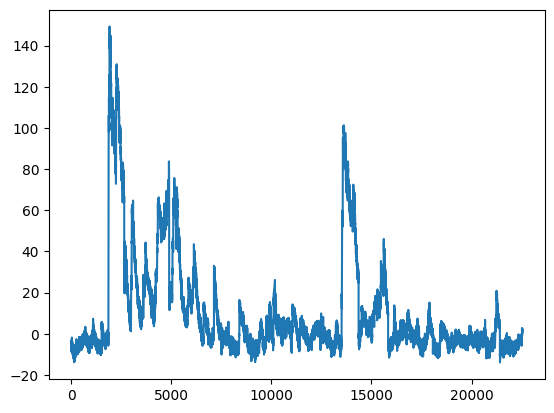

In [35]:
import matplotlib.pyplot as plt

print(data.shape)
plt.plot(data[:,0])